# List of Exercises 1 - Exercise 1

*Student: Luigi Lucas de Carvalho Silva / luigi.lcsilva@gmail.com*

First of all, let us import some useful packages.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import os
import scipy.integrate as integrate
import scipy.special as special
import scipy.interpolate as interpolate
from scipy.stats import norm

Defining the uniform distribution.

In [2]:
### Definition of the uniform distribution.
def uniform_dist(x, i, f):
    'i and f are the beginning and the end of the interval.'
    if i <= x <= f:
        y = 1/(f-i)
    else:
        y = 0
    return y

Defining the gaussian function.

In [3]:
### Gaussian distribution definition.
def gaussian(x, mu, sigma):
    g = (1/(np.sqrt(2*np.pi)*sigma))*np.exp(-(x-mu)**2/(2*sigma**2)) 
    return g

Defining the third distribution of the **first exercise**.

In [4]:
### Definition of the third distribution of the first exercise.
def exerc1_distrib3(x, x_0, sigma):
    y = (1/(np.sqrt(2*np.pi)*sigma))*(np.exp(-(x-x_0)**2/(2*sigma**2)) - np.exp(-(x+x_0)**2/(2*sigma**2)))*(1/special.erf(x_0/(np.sqrt(2)*sigma)))
    return y

Seed for the random numbers generators.

In [5]:
np.random.seed(seed=1) #Comment this for not getting fixed random numbers.

Defining common parameters for the distributions.

In [6]:
### Common parameters for the uniform distribution.
initial_unif=0
final_unif=1

### Common parameters for the gaussian.
mu_gauss = 0
sigma_gauss = 1

### Common parameters for the third distribution.
x_0 = 10
sigma_third = 5

## Exercise 1 - Letter A)

**Generating a sample from the uniform distribution**

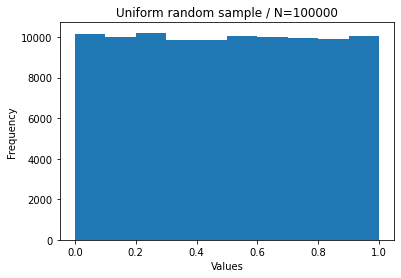

Random Sample:[4.17022005e-01 7.20324493e-01 1.14374817e-04 ... 8.18045836e-01
 5.67853567e-01 6.13057425e-01]


In [7]:
### Quantity of random numbers to be generated.
rnd_numbers_quantity = 100000

### Generating the random numbers.
rnd = np.random.random_sample(size=rnd_numbers_quantity)

### Plotting a histogram.
plt.hist(rnd)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Uniform random sample / N='+str(rnd_numbers_quantity))
plt.show()

### Printing the random sample.
print("Random Sample:"+str(rnd))

**Generating a random sample from the normal distribution**

Let us define the CDF of the gaussian function.

In [8]:
### Defining the gaussian CDF. For this, I integrate the function in a interval around some sigmas of the
### mean, and then I interpolate these values to generate the CDF.

def gaussian_cdf(x, mu, sigma, n_sigma):
    '''
    Computes the gaussian CDF. 
    "x" is the x array to be computed.
    "mu" is the mean. 
    "sigma" is the variance.
    "n_sigma" is the domain for integration and interpolation, that is, the function will work only for this 
    domain. n_sigma must be higher than 1 (but I highly suggest that you use something higher than 3 sigmas for 
    a great result).
    '''
    ### Here is the x interval where I will do the integration. I am integrating regions in steps of "step",
    ### because I will make a "cumsum()" in the integrals array for obtaining the values of the CDF.
    n_sigma = n_sigma                                    #Numbers of sigma for the interpolation to include.
    interval_division = 10**(n_sigma-1)                  #Number of divisions of the total region.
    step = 2*n_sigma*sigma/interval_division             #Steps for dividing the integration region.
    x_comp = np.arange(mu-n_sigma*sigma, mu+n_sigma*sigma+step, step) #x regions for the integrations.
    
    ### Now, I do the integration in each region and apply the "cumsum()".
    y_cdf = np.array([tup[0] for tup in [integrate.quad(gaussian, a, b, args=(mu, sigma))
                                         for a, b in [(a, b) for a, b in zip(x_comp, x_comp[1:len(x_comp)])]]]
                                         + [0]).cumsum()
    
    ### Finally, I obtain the interpolated function. I exclude the last point because it usually leads to
    ### problems (I think it has to do with the integration limits definition).
    scipy_gauss_cdf = interpolate.interp1d(x_comp[0:-1], y_cdf[0:-1], kind='cubic')
    
    ### Then, I apply this new function to the input x and return it.
    return scipy_gauss_cdf(x)

Now, let us obtain the inverse gaussian CDF.

In [9]:
### Points for interpolation. Here I get x points that are inside some sigmas around the mean.
n_sigma_gauss = 5
step_gauss = 2*n_sigma_gauss*sigma_gauss/(10**(n_sigma_gauss-1))
x_min_gauss = mu_gauss-n_sigma_gauss*sigma_gauss
x_max_gauss = mu_gauss+n_sigma_gauss*sigma_gauss

x_values_gauss = np.arange(x_min_gauss, x_max_gauss, step_gauss)
cdf_values_gauss = gaussian_cdf(x_values_gauss, mu_gauss, sigma_gauss, n_sigma_gauss)

### Defining the inverse CDF from a cubic interpolation using scipy.interpolate:
scipy_inverse_gauss_cdf = interpolate.interp1d(cdf_values_gauss, x_values_gauss, kind='cubic')

Now, let us plot both the CDF and its inverse.

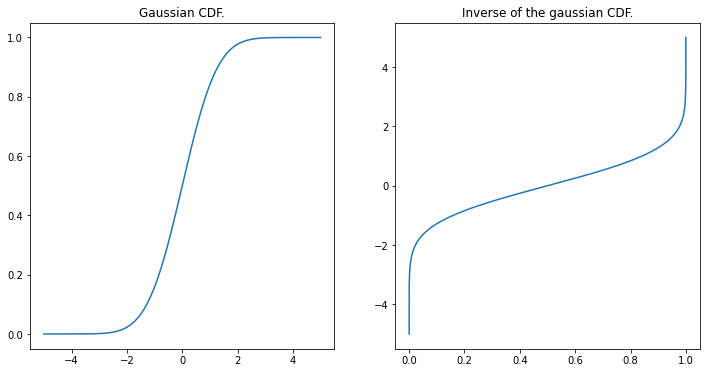

In [10]:
figure, axis = plt.subplots(1, 2, figsize=(12,6))

### Plotting the CDF.
axis[0].plot(x_values_gauss, cdf_values_gauss)
axis[0].set_title('Gaussian CDF.')

### Plotting the inverse CDF.
axis[1].plot(cdf_values_gauss, scipy_inverse_gauss_cdf(cdf_values_gauss))
axis[1].set_title('Inverse of the gaussian CDF.')

plt.show()

Finally, let us generate the normally distributed random sample by inserting in the inverse gaussian CDF a uniform random sample.

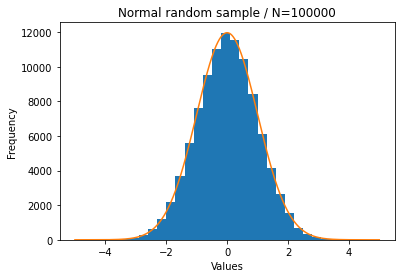

Random Sample:[-0.47300529  0.25308845 -1.14788011 ... -0.14889571  1.44205358
  2.05475649]


In [11]:
### Generating some uniform random numbers.
unif_rnd_numbers_quantity_gauss = 100000
unif_rnd_gauss = np.random.random_sample(size=unif_rnd_numbers_quantity_gauss)
# I use the line below for exclude values very next to 0 or 1, because they cause problems, since they can be
# out of the domain of the inverse CDF generated by interpolation.
unif_rnd_gauss=unif_rnd_gauss[(unif_rnd_gauss > cdf_values_gauss.min())&(unif_rnd_gauss < cdf_values_gauss.max())]                                                                                  

### Generating a gaussian distributed random sample.
x_i_gauss = scipy_inverse_gauss_cdf(unif_rnd_gauss)
bin_size_gauss = 0.3
resc_factor_gauss = bin_size_gauss*unif_rnd_numbers_quantity_gauss

### Plotting a histogram.
plt.hist(x_i_gauss, bins=np.arange(x_min_gauss,x_max_gauss,bin_size_gauss))
plt.plot(x_values_gauss, gaussian(x_values_gauss, mu_gauss, sigma_gauss)*resc_factor_gauss)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Normal random sample / N='+str(unif_rnd_numbers_quantity_gauss))
plt.show()

### Printing the random sample.
print("Random Sample:"+str(x_i_gauss))

**Generating a random sample from the third presented distribution**

Let us define the CDF of the third function.

In [12]:
### Defining the third function CDF. For this, I integrate the function in a interval around some sigmas of the
### mean, and then I interpolate these values to generate the CDF.

def exerc1_distrib3_cdf(x, x_0, sigma, n_sigma):
    '''
    Computes the third distribution CDF. 
    "x" is the x array to be computed.
    "x_0" is the x_0 parameter. 
    "sigma" is the sigma parameter.
    "n_sigma" is the domain for integration and interpolation, that is, the function will work only for this 
    domain. n_sigma must be higher than 1 (but I highly suggest that you use something higher than 3 sigmas for 
    a great result).
    '''
    ### Here is the x interval where I will do the integration. I am integrating regions in steps of "step",
    ### because I will make a "cumsum()" in the integrals array for obtaining the values of the CDF.
    n_sigma = n_sigma                                    #Numbers of sigma for the interpolation to include.
    interval_division = 10**(n_sigma-1)                  #Number of divisions of the total region.
    step = 2*n_sigma*sigma/interval_division
    ### I take care here for not taking negative values in the integration limits.
    if (x_0-n_sigma*sigma)>0:
        x_comp = np.arange(x_0-n_sigma*sigma, x_0+n_sigma*sigma+step, step)
    else:
        x_comp = np.arange(0, x_0+n_sigma*sigma+step, step)
        
    ### Now, I do the integration in each region and apply the "cumsum()".
    y_cdf = np.array([tup[0] for tup in [integrate.quad(exerc1_distrib3, a, b, args=(x_0, sigma))
                                         for a, b in [(a, b) for a, b in zip(x_comp, x_comp[1:len(x_comp)])]]]
                                         + [0]).cumsum()
    
    ### Finally, I obtain the interpolated function. I exclude the last point because it usually leads to
    ### problems (I think it has to do with the integration limits definition).
    scipy_exerc1_distrib3_cdf = interpolate.interp1d(x_comp[0:-1], y_cdf[0:-1], kind='cubic')
        
    ### Then, I apply this new function to the input x and return it.
    return scipy_exerc1_distrib3_cdf(x)

Now, let us obtain the inverse of the CDF.

In [13]:
### Points for interpolation. Here I get x points that are inside n_sigma*sigma around the mean.
n_sigma_third = 5
step_third = 2*n_sigma_third*sigma_third/10**(n_sigma_third-1)

if x_0-n_sigma_third*sigma_third>0:
    x_min_third = x_0-n_sigma_third*sigma_third
    x_max_third = x_0+n_sigma_third*sigma_third
else:
    x_min_third = 0
    x_max_third = x_0+n_sigma_third*sigma_third

x_values_third = np.arange(x_min_third, x_max_third, step_third)
cdf_values_third = exerc1_distrib3_cdf(x_values_third, x_0, sigma_third, n_sigma_third)

### Defining the inverse CDF from a cubic interpolation using scipy.interpolate:
scipy_exerc1_distrib3_inv_cdf = interpolate.interp1d(cdf_values_third, x_values_third, kind='cubic')

Now, let us plot both the CDF and its inverse.

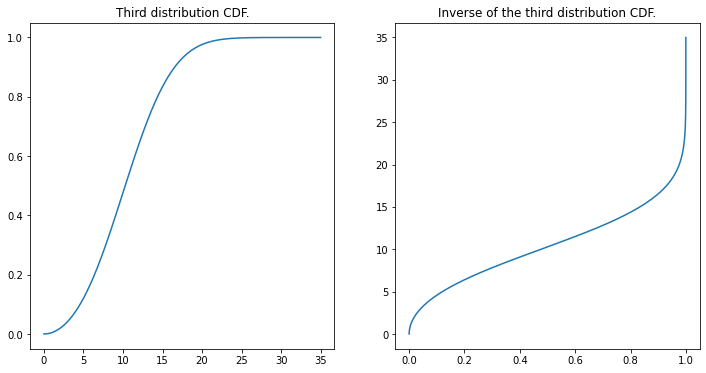

In [14]:
figure, axis = plt.subplots(1, 2, figsize=(12,6))

### Plotting the CDF.
axis[0].plot(x_values_third, cdf_values_third)
axis[0].set_title('Third distribution CDF.')

### Plotting the inverse CDF.
axis[1].plot(cdf_values_third, scipy_exerc1_distrib3_inv_cdf(cdf_values_third))
axis[1].set_title('Inverse of the third distribution CDF.')

plt.show()

Finally, let us generate the new random sample by inserting in the inverse CDF a uniform random sample.

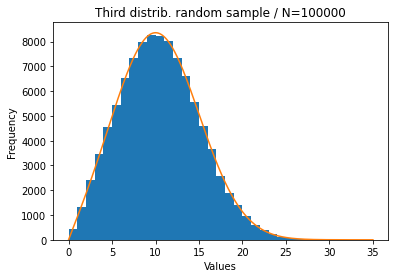

Random Sample:[11.77195845 17.43701651 12.9338583  ...  9.59142875  4.7442014
 14.04293772]


In [15]:
### Generating the random numbers.
unif_rnd_numbers_quantity_third = 100000
unif_rnd_third = np.random.random_sample(size=unif_rnd_numbers_quantity_third)
# I use the line below for exclude values very next to 0 or 1, because they cause problems, since they can be
# out of the domain of the inverse CDF generated by interpolation.
unif_rnd_third=unif_rnd_third[(unif_rnd_third > cdf_values_third.min())&(unif_rnd_third < cdf_values_third.max())]

#Third distribution random sample.
x_i_third = scipy_exerc1_distrib3_inv_cdf(unif_rnd_third)
bin_size_third = 1
resc_factor_third = bin_size_third*unif_rnd_numbers_quantity_third

plt.hist(x_i_third, bins=np.arange(x_min_third,x_max_third,bin_size_third))
plt.plot(x_values_third, exerc1_distrib3(x_values_third, x_0, sigma_third)*resc_factor_third)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Third distrib. random sample / N='+str(unif_rnd_numbers_quantity_third))
plt.show()

### Printing the random sample.
print("Random Sample:"+str(x_i_third))

## Exercise 1 - Letter B)

In this part, I will use pandas for binning the values and saving them all.

**Let us begin with the uniform distribution.**

First, let us generate uniform random samples with different sizes and save them into a dataframe.

In [16]:
### Sizes of the samples to be generated.
rnd_number_quantities_unif = [10, 100, 1000, 10000, 100000]

### Defining a dataframe for saving the values.
df_unif = pd.DataFrame()

### Making a loop.
for i in rnd_number_quantities_unif:
    ### Defining the name of each column as the size of the sample.
    name="N="+str(i)
    ### Generating the random sample for each size.
    random = np.random.random_sample(i)
    ### Defining "data" as a dict containing the name of the columns and the random sample.
    data = {name: random}
    ### Defining a new dataframe with the data.
    df_data = pd.DataFrame(data=data)
    ### Concatening this dataframe with the main one.
    df_unif = pd.concat((df_unif,df_data),axis=1)

Now, let us bin the data.

In [17]:
### Defining the bins.
step_unif = 0.1
bins_unif = np.arange(0, 1+step_unif, step_unif)

### Making a loop.
for i in rnd_number_quantities_unif:
    ### Defining the name of each column as the size of the sample.
    name="N="+str(i)
    ### Saving the bins for each sample in the dataframe.
    df_unif['BINS_'+name] = pd.cut(df_unif[name], bins_unif)

Now, let us count how many points we have in each interval.

In [18]:
### Defining a dataframe for saving the counts.
df_unif_counts = pd.DataFrame()

### Making a loop.
for i in rnd_number_quantities_unif:
    ### Defining the name of each column as the size of the sample.
    name="N="+str(i)
    ### Counting the values in each bin for each sample.
    counts = df_unif['BINS_'+name].value_counts()
    ### Defining "data" as a dict containing the name of the columns and the counts.
    data = {name: counts}
    ### Defining a new dataframe with the data.
    df_data = pd.DataFrame(data=data)
    ### Concatening this dataframe with the main one.
    df_unif_counts = pd.concat((df_unif_counts,df_data),axis=1)

### Bins are originally index in the dataframe. Here I put them as a column.
df_unif_counts = df_unif_counts.reset_index()

Now, let us compute the expected values in each interval.

In [19]:
### Setting x as bins. This will be usefull for the integration.
x=bins_unif

### Integrating the uniform distribution in each bin.
unif_PDF_integral = np.array([tup[0] for tup in [integrate.quad(uniform_dist, a, b, args=(initial_unif, final_unif))
                                             for a, b in [(a, b) for a, b in zip(x, x[1:len(x)])]]] + [0])

### Dropping the last value of the integration (this is problematic because of the limits of integration).
unif_PDF_integral = unif_PDF_integral[0:-1]

### Multiplying by n for obtaining the expected values and concatening with df_unif_counts dataframe.
for i in rnd_number_quantities_unif:
    ### Defining the name of each column of the expected values.
    name="N="+str(i)+"_expected"
    ### Multiplying the PDF integral by the size of each sample.
    unif_expected = i*unif_PDF_integral
    ### Defining "data" as a dict containing the name of the columns and the expected values.
    data = {name: unif_expected}
    ### Defining a new dataframe with the data.
    df_data = pd.DataFrame(data=data)
    ### Concatening this dataframe with the main one.
    df_unif_counts = pd.concat((df_unif_counts,df_data),axis=1)

Finally, let us compute the relative difference.

In [20]:
### Computing the relative difference, n_i/n_i_expected - 1.
for i in rnd_number_quantities_unif:
    ### Defining the name of each column of the relative difference values.
    size="N="+str(i)
    name=size+"_rel_diff"
    ### Computing the relative difference.
    rel_diff = df_unif_counts[size]/df_unif_counts[size+"_expected"] - 1
    ### Defining "data" as a dict containing the name of the columns and the relative difference values.
    data = {name: rel_diff}
    ### Defining a new dataframe with the data.
    df_data = pd.DataFrame(data=data)
    ### Concatening this dataframe with the main one.
    df_unif_counts = pd.concat((df_unif_counts,df_data),axis=1)
    
print(df_unif_counts.head())

        index  N=10  N=100  N=1000  N=10000  N=100000  N=10_expected  \
0  (0.0, 0.1]     2     11      89     1013      9972            1.0   
1  (0.1, 0.2]     0     10      96      989      9815            1.0   
2  (0.2, 0.3]     0      9     105      970     10117            1.0   
3  (0.3, 0.4]     1      9     104     1021      9951            1.0   
4  (0.4, 0.5]     1      8      97     1046     10174            1.0   

   N=100_expected  N=1000_expected  N=10000_expected  N=100000_expected  \
0            10.0            100.0            1000.0            10000.0   
1            10.0            100.0            1000.0            10000.0   
2            10.0            100.0            1000.0            10000.0   
3            10.0            100.0            1000.0            10000.0   
4            10.0            100.0            1000.0            10000.0   

   N=10_rel_diff  N=100_rel_diff  N=1000_rel_diff  N=10000_rel_diff  \
0   1.000000e+00             0.1            -

**Now, we will do it for the gaussian distribution.**

First, let us generate normal random samples with different sizes and save them into a dataframe.

In [21]:
### Sizes of the samples to be generated.
rnd_number_quantities_gauss = [10, 100, 1000, 10000, 100000]

### Defining a dataframe for saving the values.
df_gauss = pd.DataFrame()

### Making a loop.
for i in rnd_number_quantities_gauss:
    ### Defining the name of each column as the size of the sample.
    name="N="+str(i)
    
    ### Generating the random sample for each size.
    unif_rnd_numbers_quantity_gauss = i
    unif_rnd_gauss = np.random.random_sample(size=unif_rnd_numbers_quantity_gauss)
    # I use the line below for exclude values very next to 0 or 1, because they cause problems, since they can be
    # out of the domain of the inverse CDF generated by interpolation.
    unif_rnd_gauss=unif_rnd_gauss[(unif_rnd_gauss>cdf_values_gauss.min())&(unif_rnd_gauss<cdf_values_gauss.max())]
    # Third distribution random sample.
    random = scipy_inverse_gauss_cdf(unif_rnd_gauss)
    
    ### Defining "data" as a dict containing the name of the columns and the random sample.
    data = {name: random}
    ### Defining a new dataframe with the data.
    df_data = pd.DataFrame(data=data)
    ### Concatening this dataframe with the main one.
    df_gauss = pd.concat((df_gauss,df_data),axis=1)

Now, let us bin the data.

In [22]:
### Parameters for the bins definition.
n_sigma_gauss = 3
n_bins_gauss = 50
step_gauss = 2*n_sigma_gauss*sigma_gauss/n_bins_gauss
x_min_gauss = mu_gauss-n_sigma_gauss*sigma_gauss
x_max_gauss = mu_gauss+n_sigma_gauss*sigma_gauss

### Defining the bins.
bins_gauss = np.arange(x_min_gauss, x_max_gauss+step_gauss, step_gauss)

### Making a loop.
for i in rnd_number_quantities_gauss:
    ### Defining the name of each column as the size of the sample.
    name="N="+str(i)
    ### Saving the bins for each sample in the dataframe.
    df_gauss['BINS_'+name] = pd.cut(df_gauss[name], bins_gauss)

Now, let us count how many points we have in each interval.

In [23]:
### Defining a dataframe for saving the counts.
df_gauss_counts = pd.DataFrame()

### Making a loop.
for i in rnd_number_quantities_gauss:
    ### Defining the name of each column as the size of the sample.
    name="N="+str(i)
    ### Counting the values in each bin for each sample.
    counts = df_gauss['BINS_'+name].value_counts()
    ### Defining "data" as a dict containing the name of the columns and the counts.
    data = {name: counts}
    ### Defining a new dataframe with the data.
    df_data = pd.DataFrame(data=data)
    ### Concatening this dataframe with the main one.
    df_gauss_counts = pd.concat((df_gauss_counts,df_data),axis=1)

### Bins are originally index in the dataframe. Here I put them as a column.
df_gauss_counts = df_gauss_counts.reset_index()

Now, let us compute the expected values in each interval.

In [24]:
### Setting x as bins. This will be usefull for the integration.
x=bins_gauss

### Integrating the uniform distribution in each bin.
gauss_PDF_integral = np.array([tup[0] for tup in [integrate.quad(gaussian, a, b, args=(mu_gauss, sigma_gauss))
                                             for a, b in [(a, b) for a, b in zip(x, x[1:len(x)])]]] + [0])

### Dropping the last value of the integration (this is problematic because of the limits of integration).
gauss_PDF_integral = gauss_PDF_integral[0:-1]

### Multiplying by n for obtaining the expected values and concatening with df_unif_counts dataframe.
for i in rnd_number_quantities_gauss:
    ### Defining the name of each column of the expected values.
    name="N="+str(i)+"_expected"
    ### Multiplying the PDF integral by the size of each sample.
    gauss_expected = i*gauss_PDF_integral
    ### Defining "data" as a dict containing the name of the columns and the expected values.
    data = {name: gauss_expected}
    ### Defining a new dataframe with the data.
    df_data = pd.DataFrame(data=data)
    ### Concatening this dataframe with the main one.
    df_gauss_counts = pd.concat((df_gauss_counts,df_data),axis=1)

Finally, let us compute the relative difference.

In [25]:
### Computing the relative difference, n_i/n_i_expected - 1.
for i in rnd_number_quantities_gauss:
    ### Defining the name of each column of the relative difference values.
    size="N="+str(i)
    name=size+"_rel_diff"
    ### Computing the relative difference.
    rel_diff = df_gauss_counts[size]/df_gauss_counts[size+"_expected"] - 1
    ### Defining "data" as a dict containing the name of the columns and the relative difference values.
    data = {name: rel_diff}
    ### Defining a new dataframe with the data.
    df_data = pd.DataFrame(data=data)
    ### Concatening this dataframe with the main one.
    df_gauss_counts = pd.concat((df_gauss_counts,df_data),axis=1)
    
print(df_gauss_counts.head())

            index  N=10  N=100  N=1000  N=10000  N=100000  N=10_expected  \
0   (-3.0, -2.88]     0      0       2        7        69       0.006385   
1  (-2.88, -2.76]     0      1       0        5       104       0.009017   
2  (-2.76, -2.64]     0      1       2        8       120       0.012552   
3  (-2.64, -2.52]     0      0       1       19       182       0.017224   
4   (-2.52, -2.4]     0      1       1       23       230       0.023298   

   N=100_expected  N=1000_expected  N=10000_expected  N=100000_expected  \
0        0.063848         0.638478          6.384778          63.847782   
1        0.090169         0.901692          9.016922          90.169222   
2        0.125523         1.255233         12.552333         125.523328   
3        0.172244         1.722440         17.224404         172.244035   
4        0.232979         2.329794         23.297942         232.979421   

   N=10_rel_diff  N=100_rel_diff  N=1000_rel_diff  N=10000_rel_diff  \
0           -1.0     

**Finally, let us do it for the third distribution of the first exercise.**

First, let us generate random samples with different sizes from the distribution and save them into a dataframe.

In [26]:
### Sizes of the samples to be generated.
rnd_number_quantities_third = [10, 100, 1000, 10000, 100000]

### Defining a dataframe for saving the values.
df_third = pd.DataFrame()

### Making a loop.
for i in rnd_number_quantities_third:
    ### Defining the name of each column as the size of the sample.
    name="N="+str(i)
    
    ### Generating the random sample for each size.
    unif_rnd_numbers_quantity_third = i
    unif_rnd_third = np.random.random_sample(size=unif_rnd_numbers_quantity_third)
    # I use the line below for exclude values very next to 0 or 1, because they cause problems, since they can be
    # out of the domain of the inverse CDF generated by interpolation.
    unif_rnd_third=unif_rnd_third[(unif_rnd_third>cdf_values_third.min())&(unif_rnd_third<cdf_values_third.max())]
    # Third distribution random sample.
    random = scipy_exerc1_distrib3_inv_cdf(unif_rnd_third)
    
    ### Defining "data" as a dict containing the name of the columns and the random sample.
    data = {name: random}
    ### Defining a new dataframe with the data.
    df_data = pd.DataFrame(data=data)
    ### Concatening this dataframe with the main one.
    df_third = pd.concat((df_third,df_data),axis=1)

Now, let us bin the data.

In [27]:
### Parameters for the bins definition.
n_sigma_third = 3
n_bins_third = 50
step_third = 2*n_sigma_third*sigma_third/n_bins_third

if x_0-n_sigma_third*sigma_third>0:
    x_min_third = x_0-n_sigma_third*sigma_third
    x_max_third = x_0+n_sigma_third*sigma_third
else:
    x_min_third = 0
    x_max_third = x_0+n_sigma_third*sigma_third
    
bins_third = np.arange(x_min_third, x_max_third+step_third, step_third)

### Making a loop.
for i in rnd_number_quantities_third:
    ### Defining the name of each column as the size of the sample.
    name="N="+str(i)
    ### Saving the bins for each sample in the dataframe.
    df_third['BINS_'+name] = pd.cut(df_third[name], bins_third)

Now, let us count how many points we have in each interval.

In [28]:
### Defining a dataframe for saving the counts.
df_third_counts = pd.DataFrame()

### Making a loop.
for i in rnd_number_quantities_third:
    ### Defining the name of each column as the size of the sample.
    name="N="+str(i)
    ### Counting the values in each bin for each sample.
    counts = df_third['BINS_'+name].value_counts()
    ### Defining "data" as a dict containing the name of the columns and the counts.
    data = {name: counts}
    ### Defining a new dataframe with the data.
    df_data = pd.DataFrame(data=data)
    ### Concatening this dataframe with the main one.
    df_third_counts = pd.concat((df_third_counts,df_data),axis=1)

### Bins are originally index in the dataframe. Here I put them as a column.
df_third_counts = df_third_counts.reset_index()

Now, let us compute the expected values in each interval.

In [29]:
### Setting x as bins. This will be usefull for the integration.
x=bins_third

### Integrating the uniform distribution in each bin.
third_PDF_integral = np.array([tup[0] for tup in [integrate.quad(exerc1_distrib3, a, b, args=(x_0, sigma_third))
                                             for a, b in [(a, b) for a, b in zip(x, x[1:len(x)])]]] + [0])

### Dropping the last value of the integration (this is problematic because of the limits of integration).
third_PDF_integral = third_PDF_integral[0:-1]

### Multiplying by n for obtaining the expected values and concatening with df_unif_counts dataframe.
for i in rnd_number_quantities_third:
    ### Defining the name of each column of the expected values.
    name="N="+str(i)+"_expected"
    ### Multiplying the PDF integral by the size of each sample.
    third_expected = i*third_PDF_integral
    ### Defining "data" as a dict containing the name of the columns and the expected values.
    data = {name: third_expected}
    ### Defining a new dataframe with the data.
    df_data = pd.DataFrame(data=data)
    ### Concatening this dataframe with the main one.
    df_third_counts = pd.concat((df_third_counts,df_data),axis=1)

Finally, let us compute the relative difference.

In [30]:
### Computing the relative difference, n_i/n_i_expected - 1.
for i in rnd_number_quantities_third:
    ### Defining the name of each column of the relative difference values.
    size="N="+str(i)
    name=size+"_rel_diff"
    ### Computing the relative difference.
    rel_diff = df_third_counts[size]/df_third_counts[size+"_expected"] - 1
    ### Defining "data" as a dict containing the name of the columns and the relative difference values.
    data = {name: rel_diff}
    ### Defining a new dataframe with the data.
    df_data = pd.DataFrame(data=data)
    ### Concatening this dataframe with the main one.
    df_third_counts = pd.concat((df_third_counts,df_data),axis=1)
    
print(df_third_counts.head())

        index  N=10  N=100  N=1000  N=10000  N=100000  N=10_expected  \
0  (0.0, 0.6]     0      0       1       20       152       0.016310   
1  (0.6, 1.2]     0      0       6       45       438       0.049160   
2  (1.2, 1.8]     0      1       8       82       877       0.082668   
3  (1.8, 2.4]     0      2       6      127      1156       0.117177   
4  (2.4, 3.0]     0      1      19      163      1511       0.152889   

   N=100_expected  N=1000_expected  N=10000_expected  N=100000_expected  \
0        0.163101         1.631009         16.310091         163.100905   
1        0.491598         4.915982         49.159816         491.598157   
2        0.826683         8.266829         82.668292         826.682919   
3        1.171772        11.717715        117.177151        1171.771508   
4        1.528889        15.288889        152.888888        1528.888878   

   N=10_rel_diff  N=100_rel_diff  N=1000_rel_diff  N=10000_rel_diff  \
0           -1.0       -1.000000        -0.38

## Exercise 1 - Letter C)

**First, the uniform distribution.**

Let us plot the relative differences for each interval.

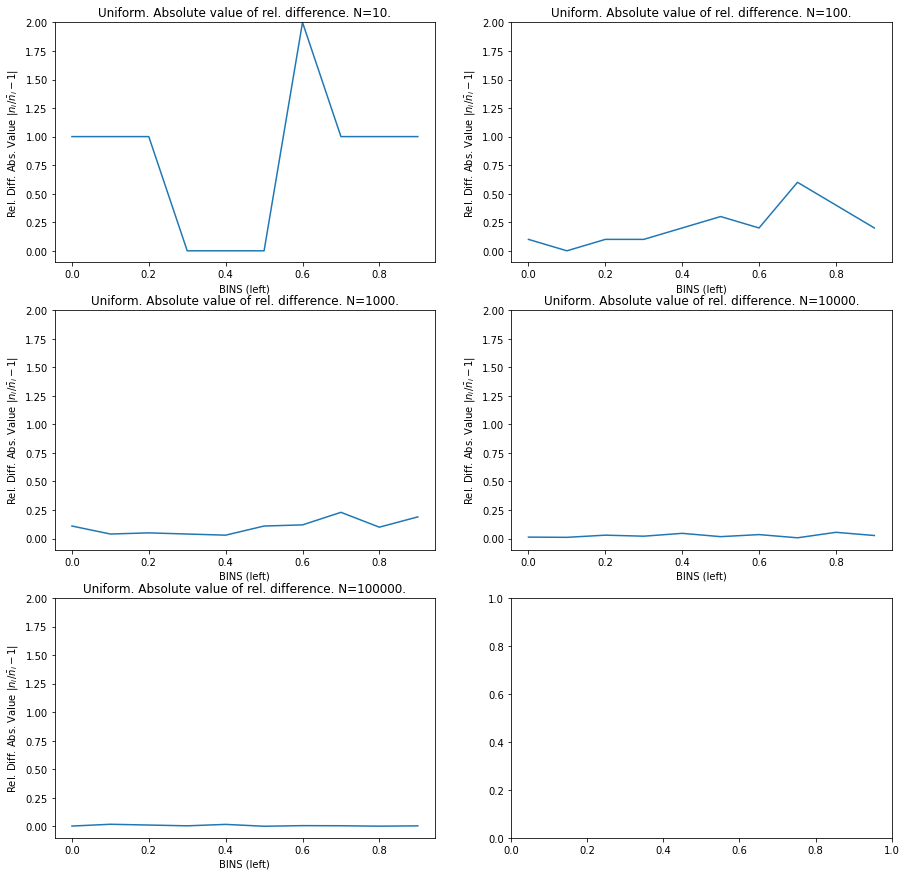

In [31]:
### First of all, I will get the left value of each bin for the plot.
s_unif = df_unif_counts['index']
left_unif = [(a.left) for a in s_unif]

### Defining the figure and axis.
figure, axis = plt.subplots(3, 2, figsize=(15,15))

#########################
### FIRST PLOT - N=10 ###
axis[0, 0].plot(left_unif, df_unif_counts['N=10_rel_diff'].abs())
axis[0, 0].set_title('Uniform. Absolute value of rel. difference. N=10.')
axis[0, 0].set_xlabel('BINS (left)')
axis[0, 0].set_ylabel('Rel. Diff. Abs. Value $|n_i/\\bar{n}_i - 1|$')
axis[0, 0].set_ylim(-0.1, 2)

#########################
### SECOND PLOT - N=100 ###
axis[0, 1].plot(left_unif, df_unif_counts['N=100_rel_diff'].abs())
axis[0, 1].set_title('Uniform. Absolute value of rel. difference. N=100.')
axis[0, 1].set_xlabel('BINS (left)')
axis[0, 1].set_ylabel('Rel. Diff. Abs. Value $|n_i/\\bar{n}_i - 1|$')
axis[0, 1].set_ylim(-0.1, 2)

#########################
### THIRD PLOT - N=1000 ###
axis[1, 0].plot(left_unif, df_unif_counts['N=1000_rel_diff'].abs())
axis[1, 0].set_title('Uniform. Absolute value of rel. difference. N=1000.')
axis[1, 0].set_xlabel('BINS (left)')
axis[1, 0].set_ylabel('Rel. Diff. Abs. Value $|n_i/\\bar{n}_i - 1|$')
axis[1, 0].set_ylim(-0.1, 2)

#########################
### FOURTH PLOT - N=10000 ###
axis[1, 1].plot(left_unif, df_unif_counts['N=10000_rel_diff'].abs())
axis[1, 1].set_title('Uniform. Absolute value of rel. difference. N=10000.')
axis[1, 1].set_xlabel('BINS (left)')
axis[1, 1].set_ylabel('Rel. Diff. Abs. Value $|n_i/\\bar{n}_i - 1|$')
axis[1, 1].set_ylim(-0.1, 2)

#########################
### FIFTH PLOT - N=100000 ###
axis[2, 0].plot(left_unif, df_unif_counts['N=100000_rel_diff'].abs())
axis[2, 0].set_title('Uniform. Absolute value of rel. difference. N=100000.')
axis[2, 0].set_xlabel('BINS (left)')
axis[2, 0].set_ylabel('Rel. Diff. Abs. Value $|n_i/\\bar{n}_i - 1|$')
axis[2, 0].set_ylim(-0.1, 2)


plt.show()

Now, let us plot the mean value of the relative differences absolute values, as a function of N.

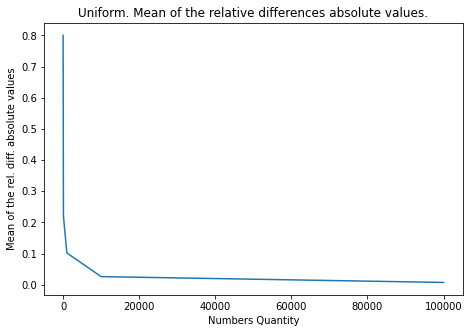

In [32]:
### Defining the figure and axis.
figure, axis = plt.subplots(1, 1, figsize=(7.5,5))

x_unif = rnd_number_quantities_unif

y_unif = [df_unif_counts['N=10_rel_diff'].abs().mean(), df_unif_counts['N=100_rel_diff'].abs().mean(),
         df_unif_counts['N=1000_rel_diff'].abs().mean(), df_unif_counts['N=10000_rel_diff'].abs().mean(),
         df_unif_counts['N=100000_rel_diff'].abs().mean()]

axis.plot(x_unif, y_unif)
axis.set_title('Uniform. Mean of the relative differences absolute values.')
axis.set_xlabel('Numbers Quantity')
axis.set_ylabel('Mean of the rel. diff. absolute values')

plt.show()

**Now, the gaussian distribution.**

Let us plot the relative differences for each interval.

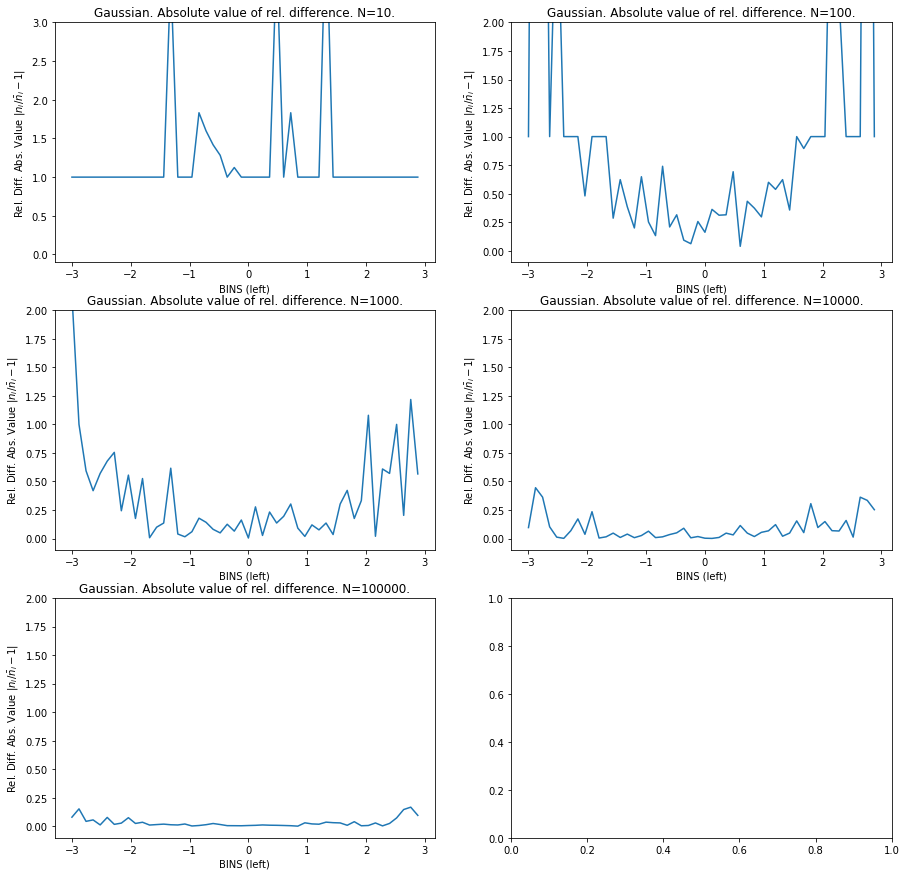

In [33]:
### First of all, I will get the left value of each bin for the plot.
s_gauss = df_gauss_counts['index']
left_gauss = [(a.left) for a in s_gauss]

### Defining the figure and axis.
figure, axis = plt.subplots(3, 2, figsize=(15,15))

#########################
### FIRST PLOT - N=10 ###
axis[0, 0].plot(left_gauss, df_gauss_counts['N=10_rel_diff'].abs())
axis[0, 0].set_title('Gaussian. Absolute value of rel. difference. N=10.')
axis[0, 0].set_xlabel('BINS (left)')
axis[0, 0].set_ylabel('Rel. Diff. Abs. Value $|n_i/\\bar{n}_i - 1|$')
axis[0, 0].set_ylim(-0.1, 3)

#########################
### SECOND PLOT - N=100 ###
axis[0, 1].plot(left_gauss, df_gauss_counts['N=100_rel_diff'].abs())
axis[0, 1].set_title('Gaussian. Absolute value of rel. difference. N=100.')
axis[0, 1].set_xlabel('BINS (left)')
axis[0, 1].set_ylabel('Rel. Diff. Abs. Value $|n_i/\\bar{n}_i - 1|$')
axis[0, 1].set_ylim(-0.1, 2)

#########################
### THIRD PLOT - N=1000 ###
axis[1, 0].plot(left_gauss, df_gauss_counts['N=1000_rel_diff'].abs())
axis[1, 0].set_title('Gaussian. Absolute value of rel. difference. N=1000.')
axis[1, 0].set_xlabel('BINS (left)')
axis[1, 0].set_ylabel('Rel. Diff. Abs. Value $|n_i/\\bar{n}_i - 1|$')
axis[1, 0].set_ylim(-0.1, 2)

#########################
### FOURTH PLOT - N=10000 ###
axis[1, 1].plot(left_gauss, df_gauss_counts['N=10000_rel_diff'].abs())
axis[1, 1].set_title('Gaussian. Absolute value of rel. difference. N=10000.')
axis[1, 1].set_xlabel('BINS (left)')
axis[1, 1].set_ylabel('Rel. Diff. Abs. Value $|n_i/\\bar{n}_i - 1|$')
axis[1, 1].set_ylim(-0.1, 2)

#########################
### FIFTH PLOT - N=100000 ###
axis[2, 0].plot(left_gauss, df_gauss_counts['N=100000_rel_diff'].abs())
axis[2, 0].set_title('Gaussian. Absolute value of rel. difference. N=100000.')
axis[2, 0].set_xlabel('BINS (left)')
axis[2, 0].set_ylabel('Rel. Diff. Abs. Value $|n_i/\\bar{n}_i - 1|$')
axis[2, 0].set_ylim(-0.1, 2)

plt.show()

Now, let us plot the mean value of the relative differences absolute values, as a function of N.

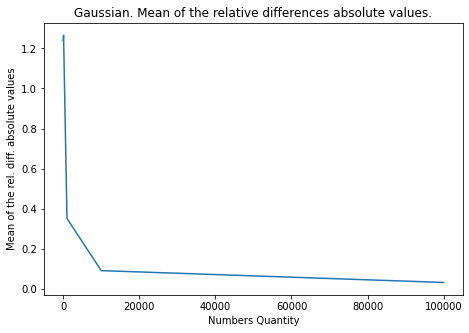

In [34]:
### Defining the figure and axis.
figure, axis = plt.subplots(1, 1, figsize=(7.5,5))

x_gauss = rnd_number_quantities_gauss

y_gauss = [df_gauss_counts['N=10_rel_diff'].abs().mean(), df_gauss_counts['N=100_rel_diff'].abs().mean(),
           df_gauss_counts['N=1000_rel_diff'].abs().mean(), df_gauss_counts['N=10000_rel_diff'].abs().mean(),
           df_gauss_counts['N=100000_rel_diff'].abs().mean()]

axis.plot(x_gauss, y_gauss)
axis.set_title('Gaussian. Mean of the relative differences absolute values.')
axis.set_xlabel('Numbers Quantity')
axis.set_ylabel('Mean of the rel. diff. absolute values')

plt.show()

**Finally, the third distribution.**

Let us plot the relative differences for each interval.

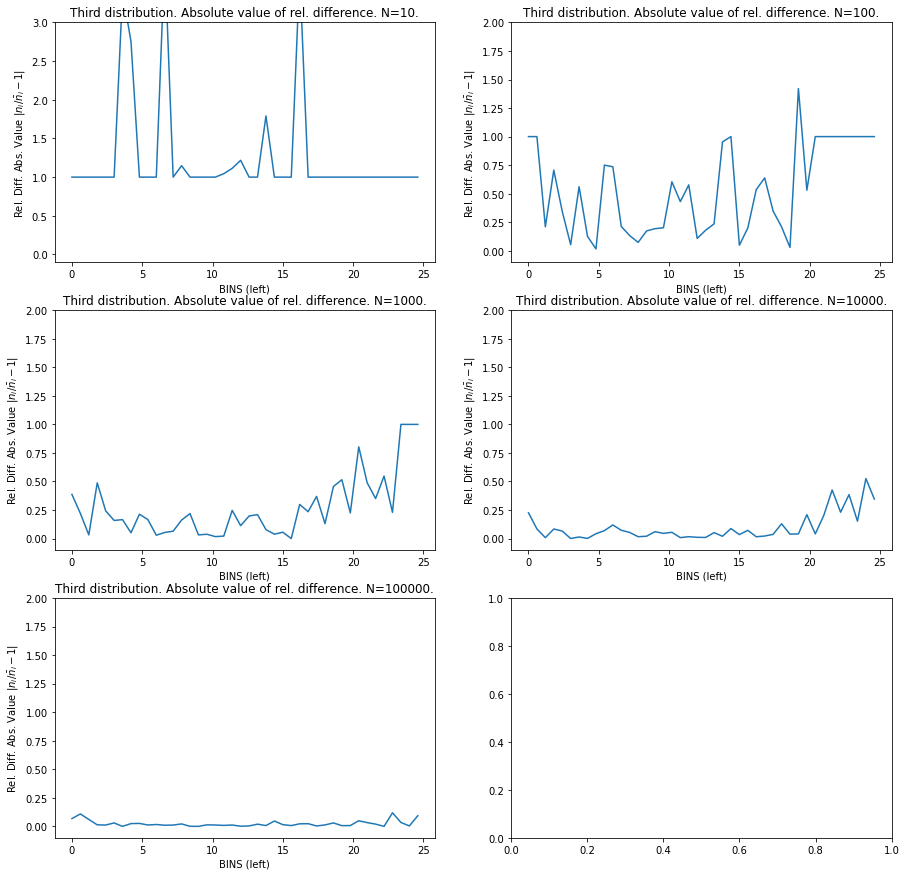

In [35]:
### First of all, I will get the left value of each bin for the plot.
s_third = df_third_counts['index']
left_third = [(a.left) for a in s_third]

### Defining the figure and axis.
figure, axis = plt.subplots(3, 2, figsize=(15,15))

#########################
### FIRST PLOT - N=10 ###
axis[0, 0].plot(left_third, df_third_counts['N=10_rel_diff'].abs())
axis[0, 0].set_title('Third distribution. Absolute value of rel. difference. N=10.')
axis[0, 0].set_xlabel('BINS (left)')
axis[0, 0].set_ylabel('Rel. Diff. Abs. Value $|n_i/\\bar{n}_i - 1|$')
axis[0, 0].set_ylim(-0.1, 3)

#########################
### SECOND PLOT - N=100 ###
axis[0, 1].plot(left_third, df_third_counts['N=100_rel_diff'].abs())
axis[0, 1].set_title('Third distribution. Absolute value of rel. difference. N=100.')
axis[0, 1].set_xlabel('BINS (left)')
axis[0, 1].set_ylabel('Rel. Diff. Abs. Value $|n_i/\\bar{n}_i - 1|$')
axis[0, 1].set_ylim(-0.1, 2)

#########################
### THIRD PLOT - N=1000 ###
axis[1, 0].plot(left_third, df_third_counts['N=1000_rel_diff'].abs())
axis[1, 0].set_title('Third distribution. Absolute value of rel. difference. N=1000.')
axis[1, 0].set_xlabel('BINS (left)')
axis[1, 0].set_ylabel('Rel. Diff. Abs. Value $|n_i/\\bar{n}_i - 1|$')
axis[1, 0].set_ylim(-0.1, 2)

#########################
### FOURTH PLOT - N=10000 ###
axis[1, 1].plot(left_third, df_third_counts['N=10000_rel_diff'].abs())
axis[1, 1].set_title('Third distribution. Absolute value of rel. difference. N=10000.')
axis[1, 1].set_xlabel('BINS (left)')
axis[1, 1].set_ylabel('Rel. Diff. Abs. Value $|n_i/\\bar{n}_i - 1|$')
axis[1, 1].set_ylim(-0.1, 2)

#########################
### FIFTH PLOT - N=100000 ###
axis[2, 0].plot(left_third, df_third_counts['N=100000_rel_diff'].abs())
axis[2, 0].set_title('Third distribution. Absolute value of rel. difference. N=100000.')
axis[2, 0].set_xlabel('BINS (left)')
axis[2, 0].set_ylabel('Rel. Diff. Abs. Value $|n_i/\\bar{n}_i - 1|$')
axis[2, 0].set_ylim(-0.1, 2)

plt.show()

Now, let us plot the mean value of the relative differences absolute values, as a function of N.

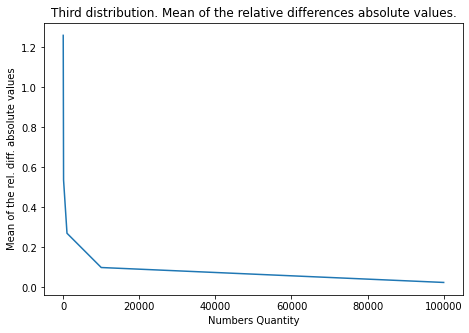

In [36]:
### Defining the figure and axis.
figure, axis = plt.subplots(1, 1, figsize=(7.5,5))

x_third = rnd_number_quantities_third

y_third = [df_third_counts['N=10_rel_diff'].abs().mean(), df_third_counts['N=100_rel_diff'].abs().mean(),
           df_third_counts['N=1000_rel_diff'].abs().mean(), df_third_counts['N=10000_rel_diff'].abs().mean(),
           df_third_counts['N=100000_rel_diff'].abs().mean()]

axis.plot(x_third, y_third)
axis.set_title('Third distribution. Mean of the relative differences absolute values.')
axis.set_xlabel('Numbers Quantity')
axis.set_ylabel('Mean of the rel. diff. absolute values')

plt.show()